In [56]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
#importing datasets
df = pd.read_csv('menu.csv')

In [58]:
df.shape

(260, 24)

In [59]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [61]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

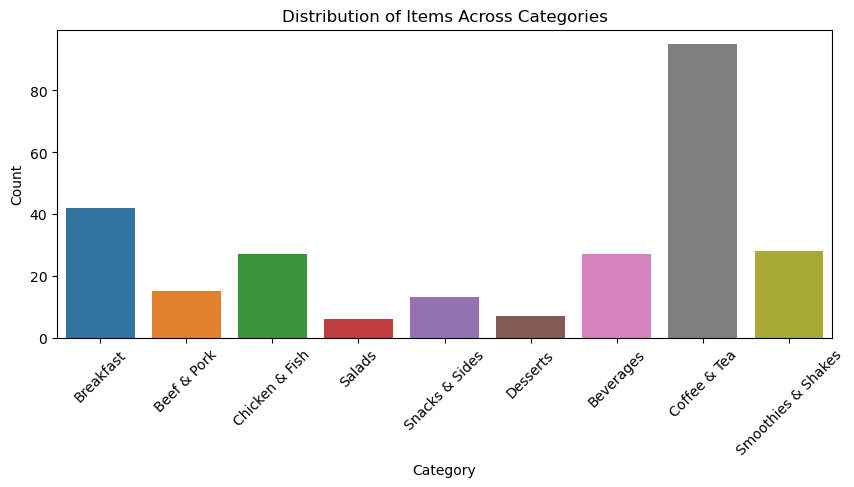

In [62]:
# plotting the category count
fig, ax = plt.subplots(figsize = (10, 4))
sns.countplot(data= df, x='Category', ax=ax)
plt.title('Distribution of Items Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


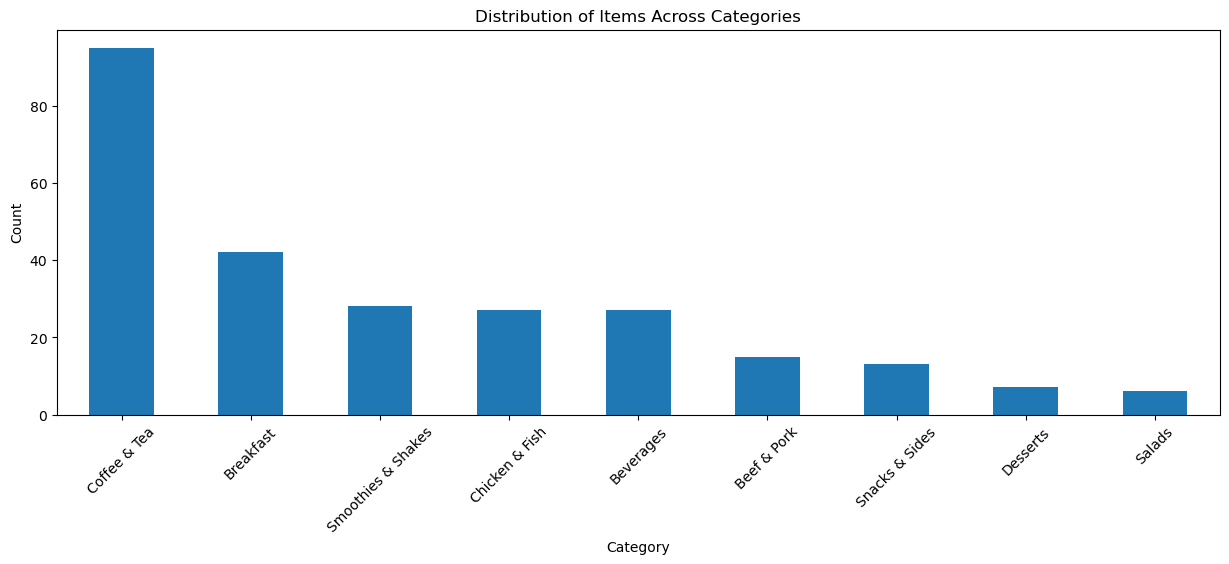

In [63]:
category_counts = df['Category'].value_counts()

# Plotting directly using pandas plot
plt.figure(figsize=(15, 5))
category_counts.plot(kind='bar')
plt.title('Distribution of Items Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

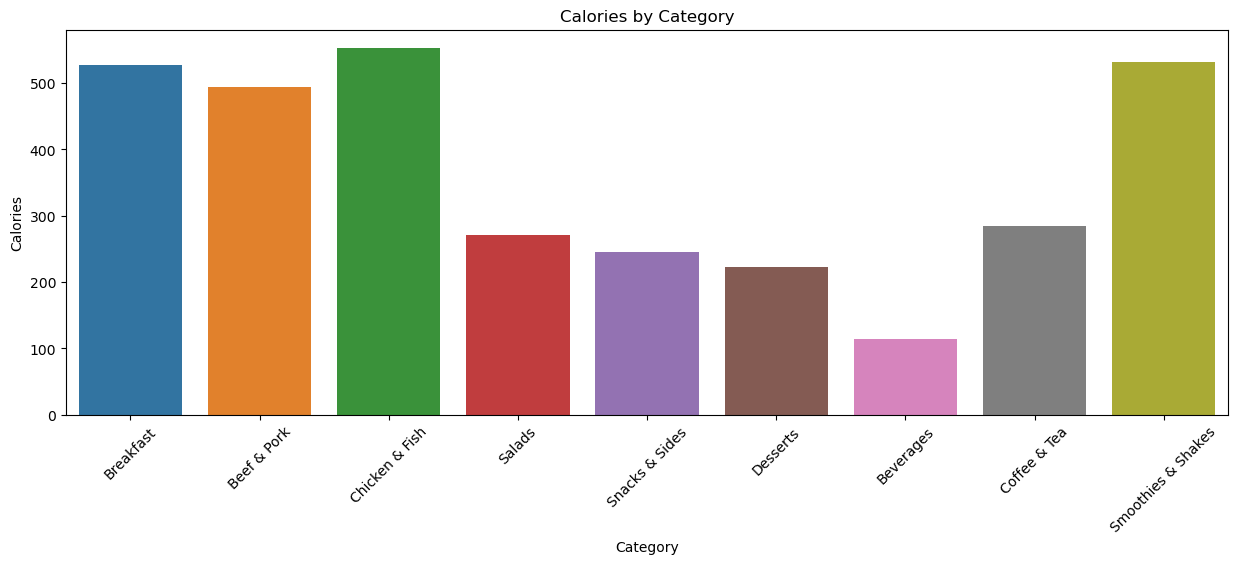

In [64]:
# Category vs Calories
plt.figure (figsize=(15, 5))
sns.barplot (data=df, x='Category', y='Calories', errorbar= None)
plt.title ('Calories by Category')
plt.xlabel ('Category')
plt.ylabel ('Calories')
plt.xticks (rotation=45)
plt.show ()

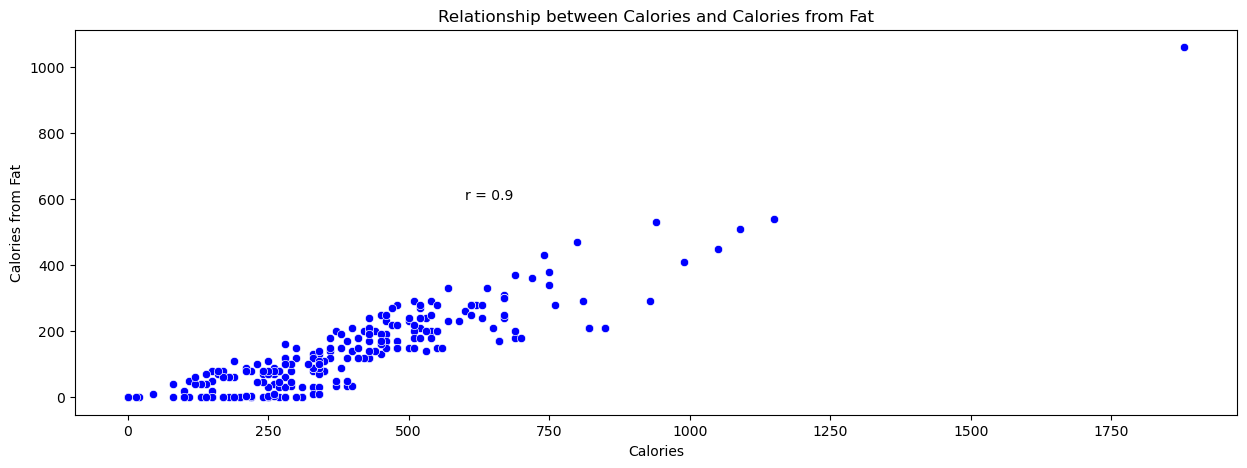

In [65]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='Calories', y='Calories from Fat', color='blue')
# Calculating correlation coefficient
correlation = df['Calories'].corr(df['Calories from Fat'])

# Adding text annotation for correlation coefficient
plt.text(600, 600, 'r = {}'.format(round(correlation, 2)))
plt.xlabel("Calories")
plt.ylabel("Calories from Fat")
plt.title("Relationship between Calories and Calories from Fat")
plt.show()

In [66]:
# Convert serving size to numeric (extracting numeric portion)
df['Serving Size (grams)'] = df['Serving Size'].str.extract('(\d+)').astype(float)

# Calculate caloric density (calories per gram)
df['Caloric Density'] = df['Calories'] / df['Serving Size (grams)']

# Display portion sizes and caloric density
portion_caloric_density = df[['Item', 'Serving Size (grams)', 'Calories', 'Caloric Density']]
print(portion_caloric_density)

                                                  Item  Serving Size (grams)  \
0                                         Egg McMuffin                   4.0   
1                                    Egg White Delight                   4.0   
2                                     Sausage McMuffin                   3.0   
3                            Sausage McMuffin with Egg                   5.0   
4                     Sausage McMuffin with Egg Whites                   5.0   
..                                                 ...                   ...   
255                 McFlurry with Oreo Cookies (Small)                  10.0   
256                McFlurry with Oreo Cookies (Medium)                  13.0   
257                 McFlurry with Oreo Cookies (Snack)                   6.0   
258  McFlurry with Reese's Peanut Butter Cups (Medium)                  14.0   
259   McFlurry with Reese's Peanut Butter Cups (Snack)                   7.0   

     Calories  Caloric Density  
0     

In [67]:
df.groupby('Category')['Trans Fat'].mean() 

Category
Beef & Pork           1.100000
Beverages             0.000000
Breakfast             0.107143
Chicken & Fish        0.129630
Coffee & Tea          0.142105
Desserts              0.000000
Salads                0.000000
Smoothies & Shakes    0.535714
Snacks & Sides        0.000000
Name: Trans Fat, dtype: float64

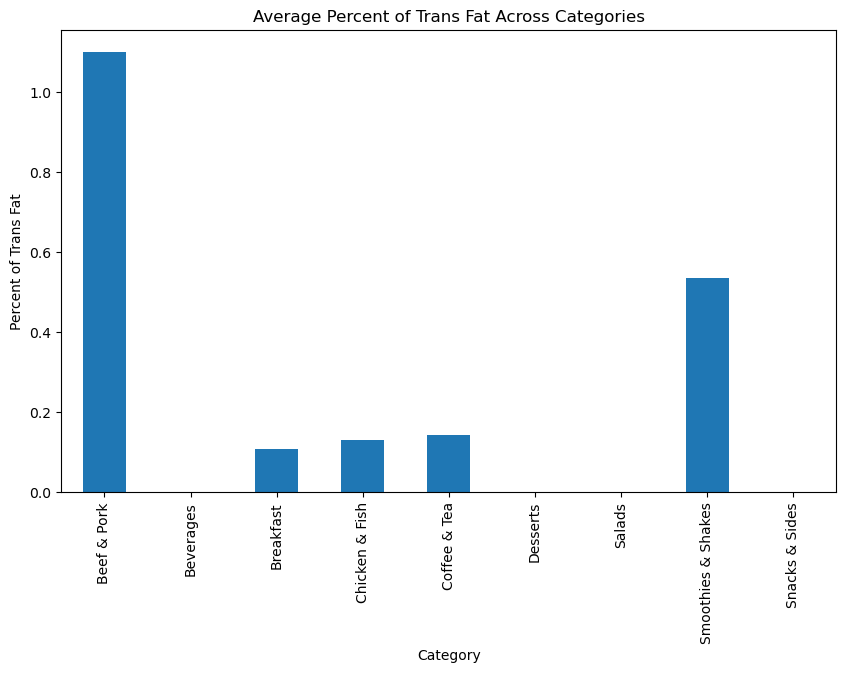

In [68]:
# Calculate the mean of trans fat for each category
menu_category = df.groupby('Category')['Trans Fat'].mean()

# Create the bar plot using a colormap
plt.figure(figsize=(10, 6), dpi=100)
menu_category.plot(kind='bar') 
plt.title("Average Percent of Trans Fat Across Categories")
plt.xlabel("Category")
plt.ylabel("Percent of Trans Fat")
plt.xticks(rotation=90)
plt.show()

In [69]:
df.groupby('Category')['Saturated Fat'].mean() 

Category
Beef & Pork           10.466667
Beverages              0.055556
Breakfast             10.654762
Chicken & Fish         6.166667
Coffee & Tea           4.921053
Desserts               4.285714
Salads                 3.750000
Smoothies & Shakes     8.375000
Snacks & Sides         2.692308
Name: Saturated Fat, dtype: float64

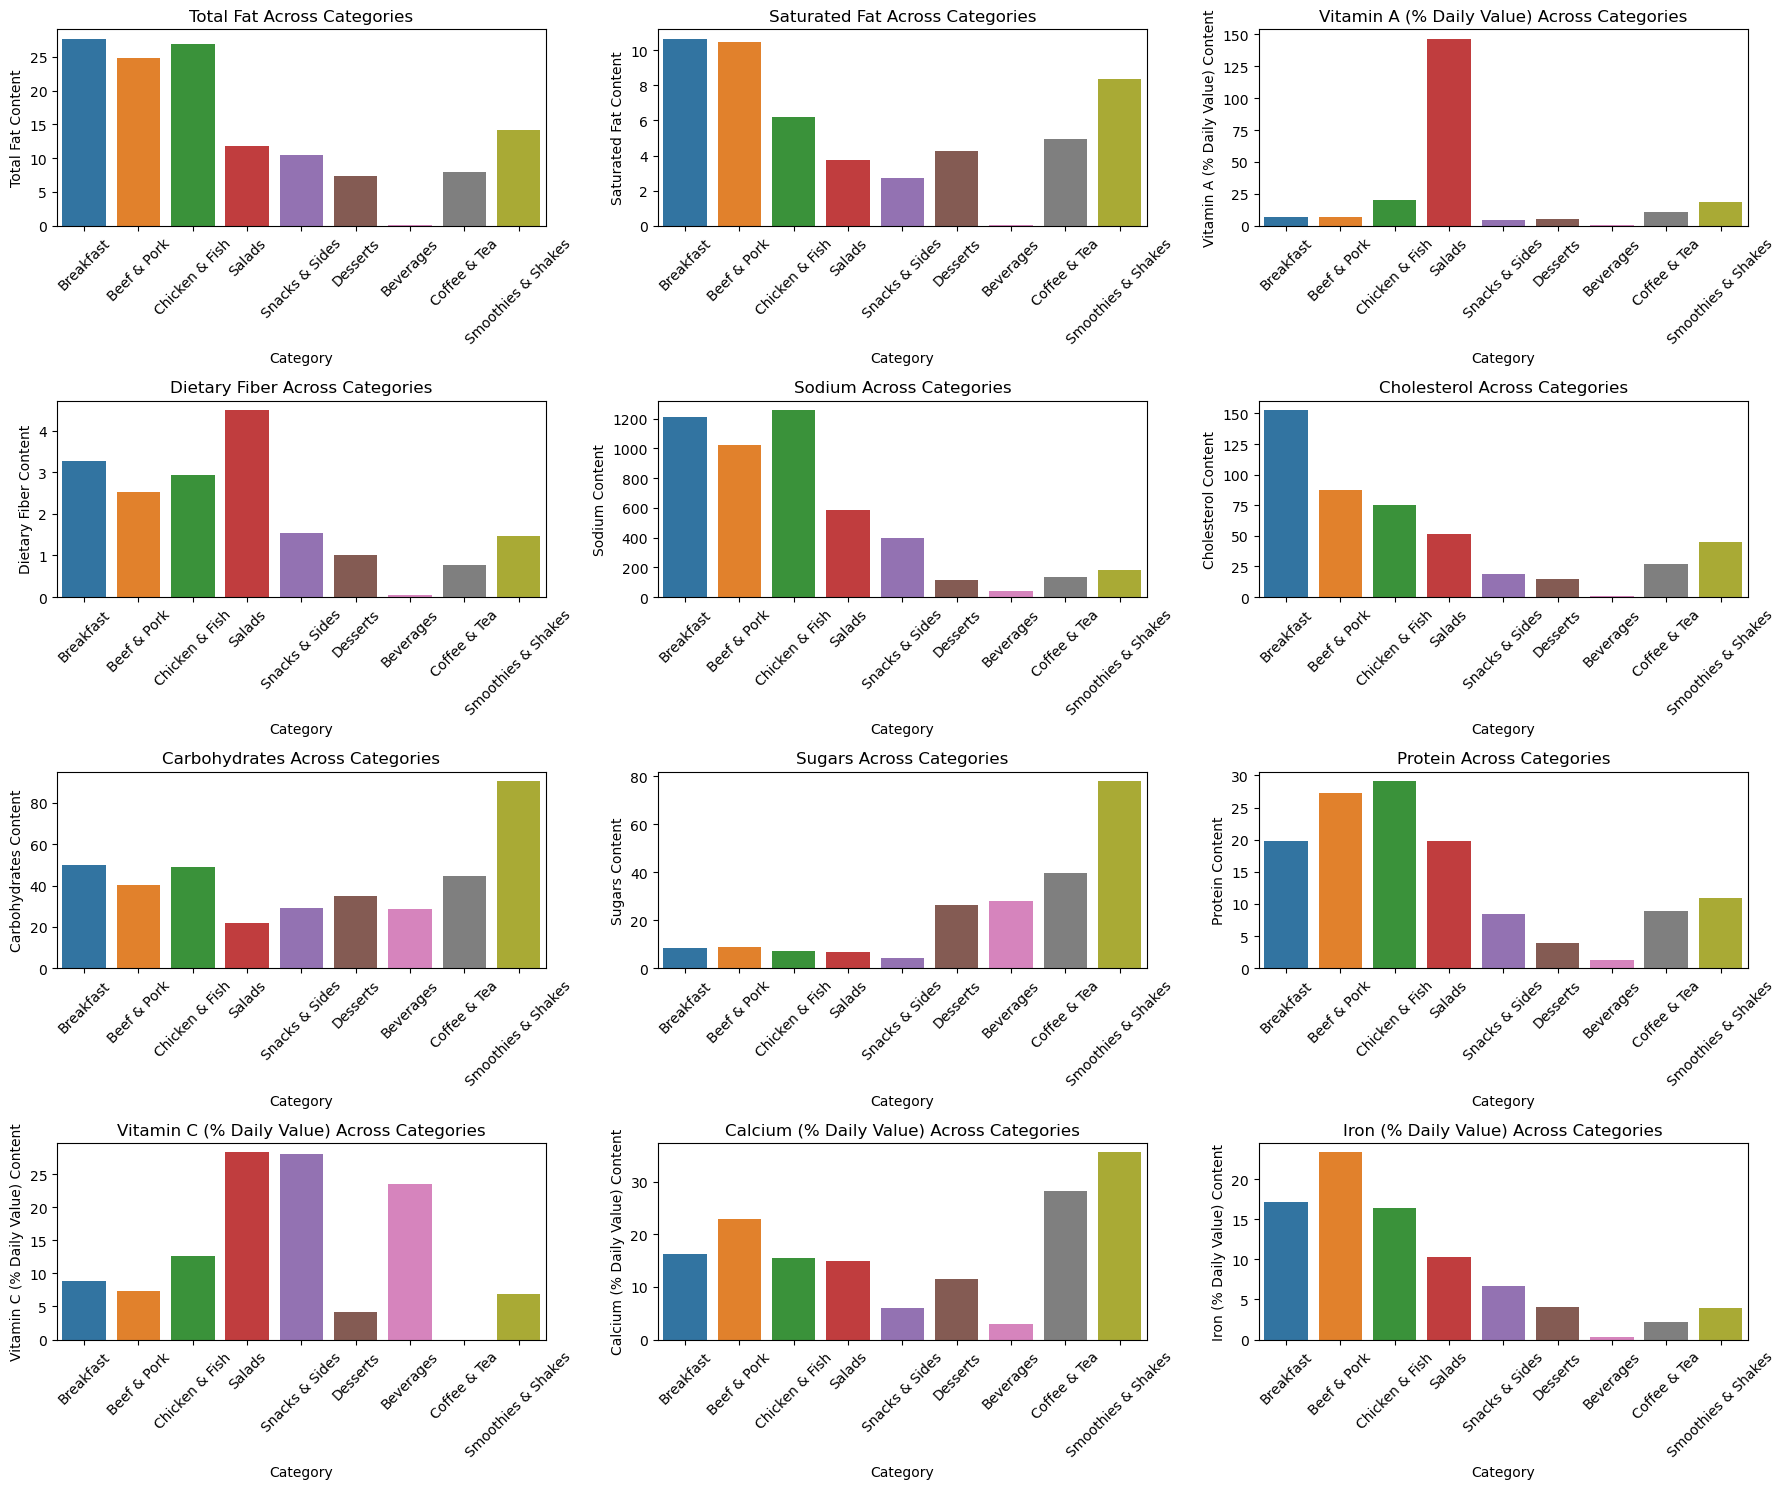

In [70]:
# Defining the list of nutrients to visualize
nutrients = ['Total Fat', 'Saturated Fat', 'Vitamin A (% Daily Value)', 
             'Dietary Fiber', 'Sodium', 'Cholesterol', 'Carbohydrates', 
             'Sugars', 'Protein', 'Vitamin C (% Daily Value)', 
             'Calcium (% Daily Value)', 'Iron (% Daily Value)']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# Iterating and creating bar plots
for i, nutrient in enumerate(nutrients):
    sns.barplot(data=df, x='Category', y=nutrient, ax=axes[i], errorbar =None)
    axes[i].set_title(f'{nutrient} Across Categories')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(f'{nutrient} Content')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [71]:
df.groupby('Category')['Carbohydrates (% Daily Value)'].mean().sort_values()

Category
Salads                 7.166667
Beverages              9.592593
Snacks & Sides         9.615385
Desserts              11.571429
Beef & Pork           13.466667
Coffee & Tea          14.863158
Chicken & Fish        16.333333
Breakfast             16.571429
Smoothies & Shakes    30.142857
Name: Carbohydrates (% Daily Value), dtype: float64

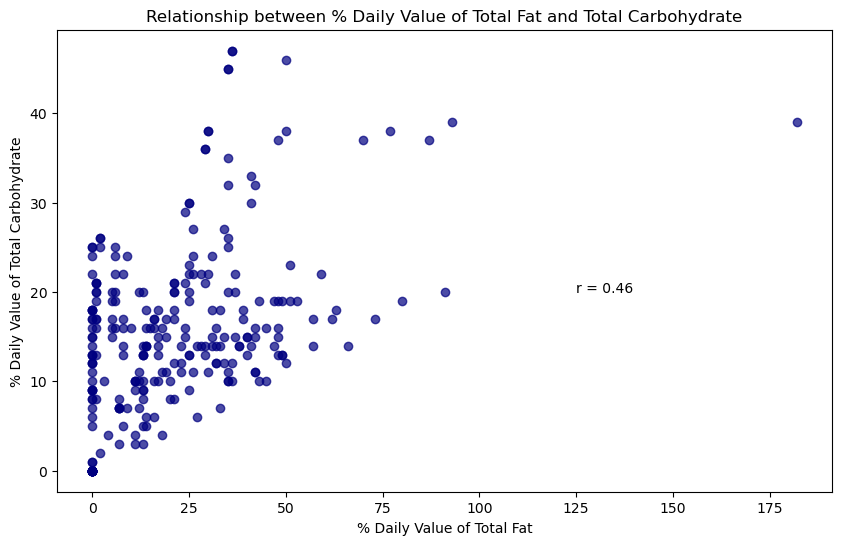

In [72]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(df['Total Fat (% Daily Value)'], df['Carbohydrates (% Daily Value)'], color='navy', alpha=0.7)

# Calculate correlation coefficient
correlation = df['Total Fat (% Daily Value)'].corr(df['Carbohydrates (% Daily Value)'])

# Add text annotation for correlation coefficient
plt.text(125, 20, 'r = {}'.format(round(correlation, 2)))

# Set labels and title
plt.xlabel("% Daily Value of Total Fat")
plt.ylabel("% Daily Value of Total Carbohydrate")
plt.title("Relationship between % Daily Value of Total Fat and Total Carbohydrate")
plt.show()

In [73]:
df.groupby('Category')['Vitamin A (% Daily Value)'].mean()

Category
Beef & Pork             6.933333
Beverages               0.740741
Breakfast               6.928571
Chicken & Fish         20.444444
Coffee & Tea           10.736842
Desserts                5.142857
Salads                146.666667
Smoothies & Shakes     18.750000
Snacks & Sides          4.846154
Name: Vitamin A (% Daily Value), dtype: float64

In [74]:
df.groupby('Category')['Vitamin C (% Daily Value)'].mean()

Category
Beef & Pork            7.333333
Beverages             23.481481
Breakfast              8.904762
Chicken & Fish        12.629630
Coffee & Tea           0.000000
Desserts               4.142857
Salads                28.333333
Smoothies & Shakes     6.964286
Snacks & Sides        28.153846
Name: Vitamin C (% Daily Value), dtype: float64

In [75]:
beverage = df[df ['Category'] == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values()

Item
Diet Dr Pepper (Small)                 0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Sprite (Small)                         0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-Cola Classic (Small)              0.0
Coca-Cola Classic (Medium)             0.0
Coca-Cola Classic (Large)              0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Child)                 0.0
1% Low Fat Milk Jug                    4.0
Minute

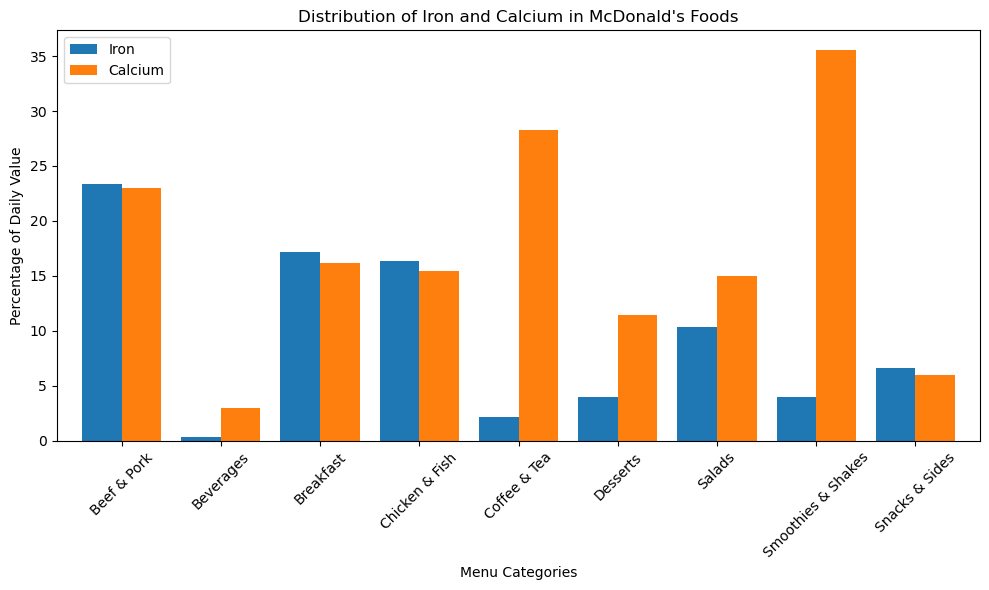

In [76]:
# Group by 'Category' and calculate mean values for 'Iron (% Daily Value)' and 'Calcium (% Daily Value)'
micro_nutrients = df.groupby('Category')[['Iron (% Daily Value)', 'Calcium (% Daily Value)']].mean()

# Create the bar plot directly from the grouped data
micro_nutrients.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add labels and title
plt.xlabel("Menu Categories")
plt.ylabel("Percentage of Daily Value")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend(["Iron", "Calcium"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()